In [6]:
import re
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# 设置字体为微软雅黑
rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 中文字体
rcParams['axes.unicode_minus'] = False  # 避免负号显示为方块

# 定义函数以从文件中提取数据
def extract_data_from_log(file_path):
    data = {
        "InfiniGen (Ours)": []
    }
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i in range(len(lines)):
            if 'Total' in lines[i]:
                # 提取标签
                current_key = lines[i - 3].strip()
                # 提取数值
                total = float(lines[i].split(":")[1].split()[0])  # 只提取 Total 的数值部分
                data[current_key].append(total)

    return data

# 读取日志文件内容
log_file_path = "log"  # 替换为您的日志文件路径

# 提取数据
data = extract_data_from_log(log_file_path)

infinigen_totals = data["InfiniGen (Ours)"]  # InfiniGen 数据

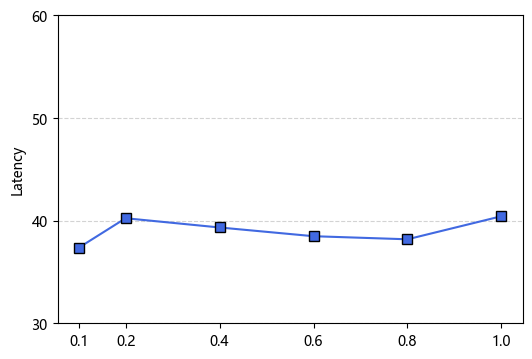

In [10]:
Partial_Weight_Ratio = [0.1,0.2,0.4,0.6,0.8,1.0]
# 创建图表和坐标轴
fig, ax1 = plt.subplots(figsize=(6,4))

# 设置x轴刻度，只显示 1, 3, 5, 7, 9
ax1.set_xticks([0.1,0.2,0.4,0.6,0.8,1.0])  # 关键修改：设置 x 轴刻度

# 绘制 Latency
ax1.plot(Partial_Weight_Ratio, infinigen_totals, marker='s', markerfacecolor='royalblue', markeredgecolor='black', markersize=7, color='royalblue', label='Latency')
ax1.set_ylabel('Latency', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim([30,60])
ax1.set_yticks(range(30, 61, 10))


# 添加图例
lines1, labels1 = ax1.get_legend_handles_labels()

# 添加网格线
ax1.grid(axis='y', linestyle='--', color='lightgray')


# 显示图像
plt.show()
fig.savefig('17b.pdf', dpi=300, bbox_inches='tight')

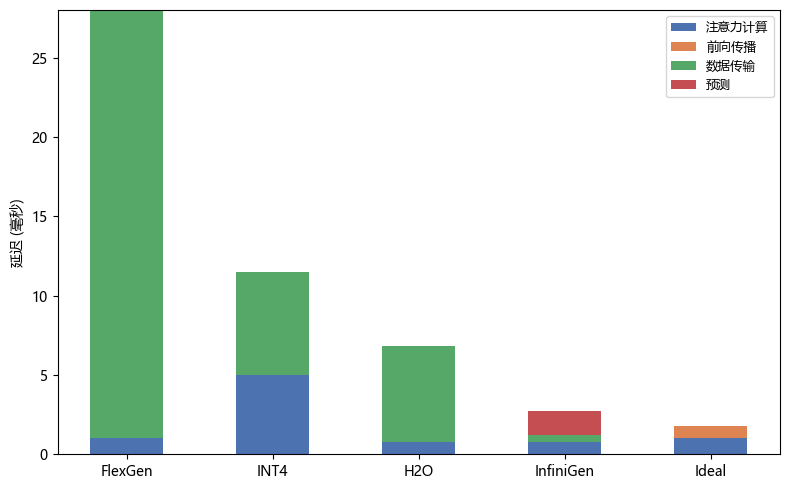

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# 设置字体为微软雅黑
rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 中文字体
rcParams['axes.unicode_minus'] = False  # 避免负号显示为方块
# Data
groups = ['FlexGen', 'INT4', 'H2O', 'InfiniGen', 'Ideal']
attention = [1, 5, 0.8, 0.8, 1]  # Adjusted for INT4 attention impact
ffn = [0.0, 0.0, 0.0, 0.0, 0.8]  # FFN not shown except for Ideal
data_transfer = [27.0, 6.5, 6, 0.4, 0.0]  # Highlighting data transfer dominance
prediction = [0.0, 0.0, 0.0, 1.5, 0.0]

# Bar width
bar_width = 0.5
x = np.arange(len(groups))

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))

p1 = ax.bar(x, attention, bar_width, label='注意力计算', color='#4C72B0')
p2 = ax.bar(x, ffn, bar_width, bottom=attention, label='前向传播', color='#DD8452')
p3 = ax.bar(x, data_transfer, bar_width, bottom=np.array(attention) + np.array(ffn), label='数据传输', color='#55A868')
p4 = ax.bar(x, prediction, bar_width, bottom=np.array(attention) + np.array(ffn) + np.array(data_transfer), label='预测', color='#C44E52')

# Adding text annotations
values = [28.0, 8.0, 3.0, 1.2, 0.6]
# for i, v in enumerate(values):
#     ax.text(x[i], v + 0.5, f'{v:.1f}', ha='center', fontsize=10)

# Labels, title, and legend
ax.set_xlabel('')
ax.set_ylabel('延迟 (毫秒)')
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.legend(loc='upper right', fontsize=9)

# Fine-tune layout
plt.tight_layout()
plt.show()
fig.savefig('18.pdf', dpi=300, bbox_inches='tight')